<a href="https://colab.research.google.com/github/rafi1903139/pytorch_practice_notebook/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sun Nov 24 00:40:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


2.5.1+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
'''

  1. Medical Imaging
    Help to detect disease also provide real time information to during surgery
  2. Robotics
    Help to navigate robots by providing visual information
  3. Industry
    Asses the quality of the product by using visual data

'''

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
'''

  Overfitting:
    A scenerio in machine learning where the model learns the train data too well but do poor on test data and can't generalize dew to small training dataset, less variation or error in data also in overly complicated model(more parameter than the data available)

'''

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
'''

  Ways to prevent overfitting:
  1. Cross validation:
      By paritioning the dataset into multiple set and using their combination to train the model.
  2. Data augmentaion:
      Artificially generate more data from the existing data to train the model.
  3. Data Regularization:
      penalty to the loss function, remove or ignoring certain neurons during training(dropout)

'''

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
'''

CNN(Convolutional Neural Network)
A special type of neural network where a convolutional layer exist which can extract underlying pattern from image data.

It is mainly used for image classification, object detection, segmentation.

conv -> ReLU -> MaxPool


'''

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import MNIST train and test datasets
train_dataset = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
)

test_dataset = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True,
)

len(train_dataset), len(test_dataset)

(60000, 10000)

In [4]:
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

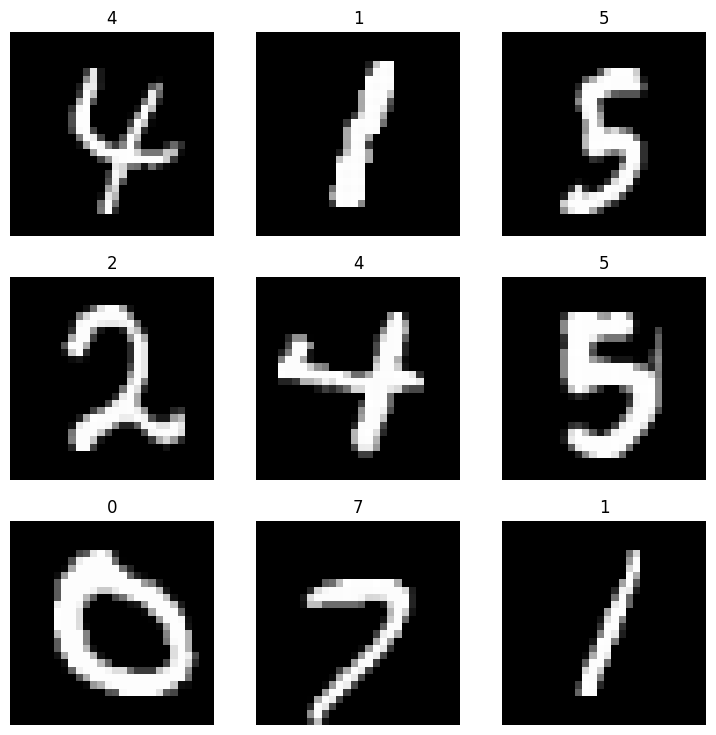

In [21]:
import matplotlib.pyplot as plt

rows, cols = (3, 3)
fig = plt.figure(figsize=(9, 9))

for i in range(1, (rows*cols) + 1):
  # prepare figure to add the data
  fig.add_subplot(rows, cols, i)
  random_idx = torch.randint(0, len(train_dataset), size=[1]).item()

  # get data from the training set
  sample, label = train_dataset[random_idx]

  # display data
  plt.imshow(sample.squeeze(), cmap='gray')
  plt.title(label)
  plt.axis('off')


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?